In [1]:
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
from math import cos, pi

In [2]:
def show_plot(x, y, title='', xlabel='', ylabel=''):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
a0 = 1
a1 = 0
a2 = 0.1716

b0 = 0.2929
b1 = -0.5858 
b2 = 0.2929

In [4]:
a = [a0, a1, a2]
b = [b0, b1, b2]

In [5]:
secs = 1

f1 = 150
f2 = 500
f3 = 20
fsample = 2000

In [6]:
t = np.arange(0, secs, 1/fsample)
f = np.arange(0, fsample, fsample/len(t))
cos_w = np.array([cos(2*pi*f1*ti) + cos(2*pi*f2*ti) + cos(2*pi*f3*ti) for ti in t])

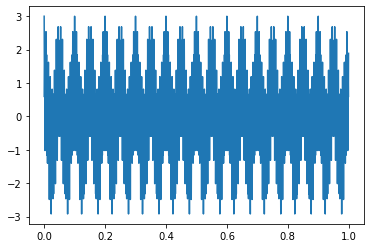

In [7]:
plt.plot(t, cos_w)
plt.show()

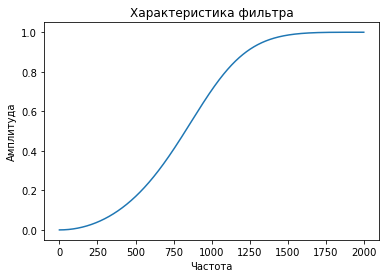

In [8]:
w,h = scipy.signal.freqz(b, a, fsample * secs)
show_plot(f, abs(h), 'Характеристика фильтра', 'Частота', 'Амплитуда')

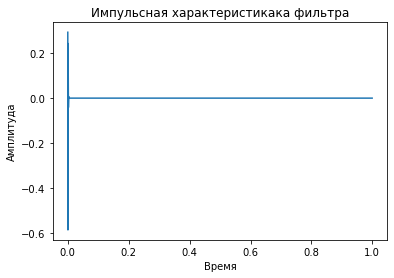

In [9]:
x = np.zeros(len(t))
x[0] = 1
y = scipy.signal.lfilter(b, a, x)

show_plot(t, y, 'Импульсная характеристикака фильтра', 'Время', 'Амплитуда')

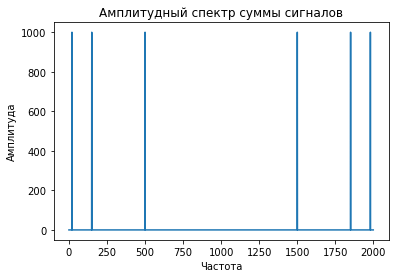

In [10]:
w_ampl = abs(np.fft.fft(cos_w));
show_plot(f, w_ampl, 'Амплитудный спектр суммы сигналов', 'Частота', 'Амплитуда');

In [11]:
f1_y = scipy.signal.lfilter(b, a, cos_w)
f1_ampl = abs(np.fft.fft(f1_y))

f2_y = np.fft.ifft(np.fft.fft(cos_w) * np.fft.fft(b, len(t)) / np.fft.fft(a, len(t)))
f2_ampl = abs(np.fft.fft(f2_y))

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


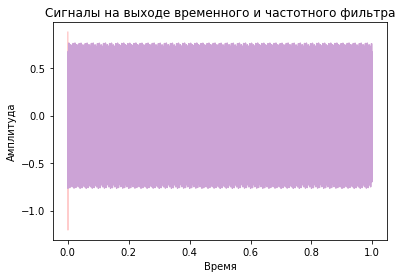

In [12]:
plt.plot(t, f1_y, c=[1, 0, 0, 0.2])
plt.title('Сигналы на выходе временного и частотного фильтра')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.plot(t, f2_y, c=[0, 0, 1, 0.2])
# plt.xlim(-0.05, 0.2)
plt.show()

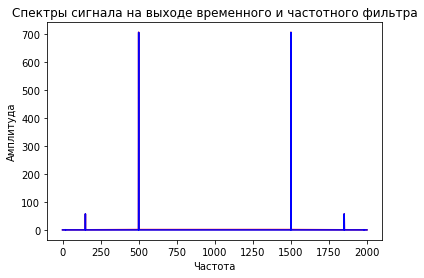

In [13]:
plt.plot(f, f1_ampl, c = 'red')
plt.title('Спектры сигнала на выходе временного и частотного фильтра')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.plot(f, f2_ampl, c = 'blue')
# plt.xlim(498,502)
plt.show()